In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
X,y = make_classification(n_samples=1000, n_features=2,
                    n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
                    n_clusters_per_class=2, weights=None, flip_y=0.01,
                    class_sep=1.5, hypercube=True, shift=0.0, scale=1.0,
                    shuffle=True, random_state=69)

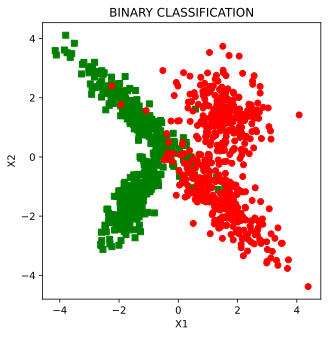

In [3]:
# convert to a pytorch tensor
data = torch.tensor(X).float()
labels = torch.tensor(y).float()
labels = labels.view(-1, 1)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'gs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ro')
plt.title('BINARY CLASSIFICATION')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [4]:
# a function that creates the ANN model

def model():
    # model architecture
    ann = nn.Sequential(
      nn.Linear(2,1),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
        )

    # loss function
    lossfunc = nn.BCEWithLogitsLoss()

    # optimizer
    optim = torch.optim.SGD(ann.parameters(),lr=.01)

    # model output
    return ann,lossfunc,optim

In [5]:
# train the model

# global parameter
epochs = 200

def train(trainProp):

    # initialize losses
    losses = torch.zeros(epochs)
    train_accuracy = []
    test_accuracy  = []

    # loop over epochs
    for i in range(epochs):

        # separate train from test data
        # Note 1: unique split for each epoch!
        # Note 2: here we specify the training size, not the testing size!
        X_train,X_test, y_train,y_test = train_test_split(data,labels, train_size=trainProp, random_state=None, shuffle=True, stratify=None)


        # forward pass and loss
        pred_train = ann(X_train)
        loss = lossfunc(pred_train,y_train)

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()

        pred_train_proba = torch.sigmoid(pred_train).detach()

        # convert probabilities to binary predictions (0 or 1) based on threshold of 0.5
        pred_train_labels = (pred_train_proba >= 0.5).float()

        # compute accuracy for train set
        train_accuracy.append(100 * torch.mean((pred_train_labels == y_train).float()).item())

        # get predicted probabilities for the test set and convert to binary predictions
        pred_test_proba = torch.sigmoid(ann(X_test)).detach()
        pred_test_labels = (pred_test_proba >= 0.5).float()

        # compute accuracy for test set
        test_accuracy.append(100 * torch.mean((pred_test_labels == y_test).float()).item())

    # function output
    return train_accuracy,test_accuracy


# Test the model by running it once

In [6]:
# create a model
ann,lossfunc,optim = model()

# train the model
# NOTE: the input is the training proportion, not the test proportion!
train_accuracy,test_accuracy = train(.8)


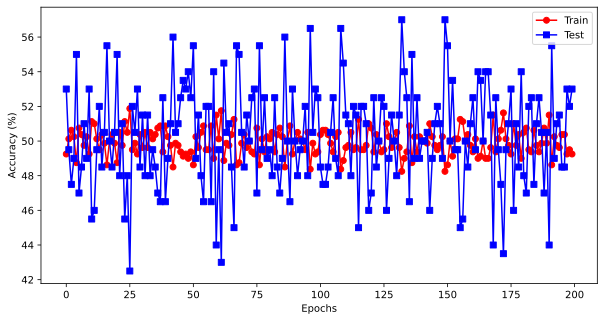

In [7]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(train_accuracy,'ro-')
plt.plot(test_accuracy,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()

# What happened here?
---
Look at the graph of the data.


Important: Test accuracy should not exceed training accuracy, as the model is specifically optimized for the training data. Possible reasons for this behavior include:

1. The test dataset may differ from the training dataset. It’s crucial to perform a proper train/test split, ensuring both sets come from the same underlying distribution. It’s likely that the test data used was from a completely different, potentially easier, dataset.

2. Excessive regularization was applied. However, even with high regularization, the test and training data distributions would need to differ for this result to occur.

# Now for the experiment

In [8]:
trainSetSizes = np.linspace(.2,.95,10)

alltrain_accuracy = np.zeros((len(trainSetSizes),epochs))
alltest_accuracy = np.zeros((len(trainSetSizes),epochs))

for i in range(len(trainSetSizes)):

    # create a model
    ann,lossfunc,optim = model()

    # train the model
    train_accuracy,test_accuracy = train(trainSetSizes[i])

    # store the results
    alltrain_accuracy[i,:] = train_accuracy
    alltest_accuracy[i,:] = test_accuracy

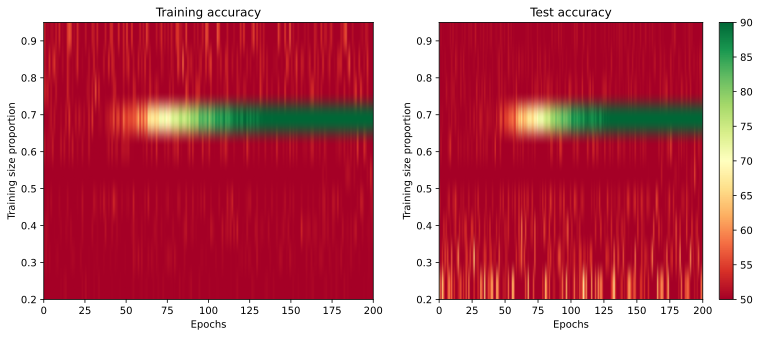

In [9]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

# First plot with red-to-green spectrum
ax[0].imshow(alltrain_accuracy, aspect='auto', vmin=50, vmax=90,
             extent=[0, epochs, trainSetSizes[0], trainSetSizes[-1]], cmap='RdYlGn')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

# Second plot with red-to-green spectrum
p = ax[1].imshow(alltest_accuracy, aspect='auto', vmin=50, vmax=90,
                 extent=[0, epochs, trainSetSizes[0], trainSetSizes[-1]], cmap='RdYlGn')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')

# Adding a colorbar
fig.colorbar(p, ax=ax[1])

plt.show()

# Experiments

1. Redo the experiment but this time stratify the train-test split in terms of the y values. Compare the result to the original, provide an explaination.

2. Redo the experiment but this time try to set seed (any number) the experiment without stratification. Compare the result to the original, provide an explaination.

3. Redo the experiment but this time try to set seed (any number) the experiment with stratification. Compare the result to the original, provide an explaination.

4. Try to improve the model by adding more layers, and changing the value of the learning rate. Creat a bubblechart with the x-axis as the epochs, y-axis as the learning rate, the size of the bubble as the layers, and the color as the accuracy.

#Experiment 1

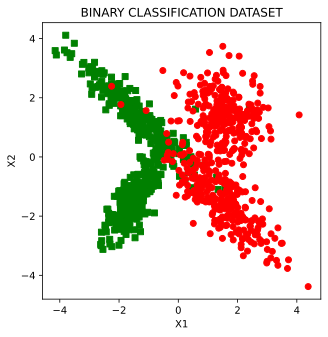

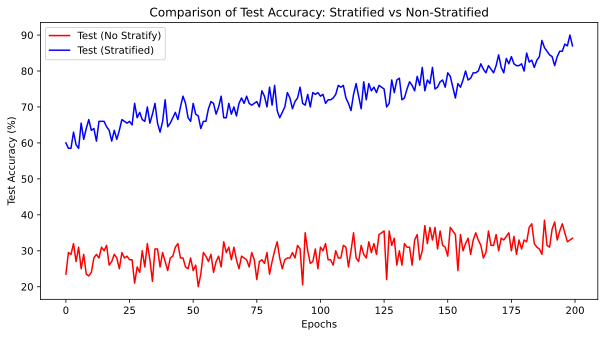

Average Test Accuracy (No Stratify): 29.68%
Average Test Accuracy (Stratified):  73.14%


In [22]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ---------------------------------------------------------
# 1. Generate data
# ---------------------------------------------------------
X, y = make_classification(
    n_samples=1000, n_features=2,
    n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
    n_clusters_per_class=2, weights=None, flip_y=0.01,
    class_sep=1.5, hypercube=True, shift=0.0, scale=1.0,
    shuffle=True, random_state=69
)

# convert to a pytorch tensor
data = torch.tensor(X).float()
labels = torch.tensor(y).float()
labels = labels.view(-1, 1)

# visualize the dataset
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'gs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ro')
plt.title('BINARY CLASSIFICATION DATASET')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# ---------------------------------------------------------
# 2. Define model creation function
# ---------------------------------------------------------
def model():
    ann = nn.Sequential(
        nn.Linear(2,1),   # input layer
        nn.ReLU(),        # activation unit
        nn.Linear(1,1)    # output unit
    )
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(ann.parameters(), lr=0.01)
    return ann, lossfunc, optim

# ---------------------------------------------------------
# 3. Define training function
# ---------------------------------------------------------
epochs = 200

def train(trainProp, stratify=False):
    # initialize model
    ann, lossfunc, optim = model()

    # initialize accuracy lists
    train_accuracy = []
    test_accuracy  = []

    for i in range(epochs):
        # stratify option
        strat_labels = labels if stratify else None

        # split data
        X_train, X_test, y_train, y_test = train_test_split(
            data, labels, train_size=trainProp, shuffle=True, stratify=strat_labels
        )

        # forward pass and loss
        pred_train = ann(X_train)
        loss = lossfunc(pred_train, y_train)

        # backpropagation
        optim.zero_grad()
        loss.backward()
        optim.step()

        # compute accuracy (train)
        pred_train_proba = torch.sigmoid(pred_train).detach()
        pred_train_labels = (pred_train_proba >= 0.5).float()
        acc_train = 100 * torch.mean((pred_train_labels == y_train).float()).item()
        train_accuracy.append(acc_train)

        # compute accuracy (test)
        pred_test_proba = torch.sigmoid(ann(X_test)).detach()
        pred_test_labels = (pred_test_proba >= 0.5).float()
        acc_test = 100 * torch.mean((pred_test_labels == y_test).float()).item()
        test_accuracy.append(acc_test)

    return train_accuracy, test_accuracy

# ---------------------------------------------------------
# 4. Run experiments
# ---------------------------------------------------------
trainProp = 0.8

# Run without stratification
train_acc_noStrat, test_acc_noStrat = train(trainProp, stratify=False)

# Run with stratification
train_acc_strat, test_acc_strat = train(trainProp, stratify=True)

# ---------------------------------------------------------
# 5. Plot comparison
# ---------------------------------------------------------
fig = plt.figure(figsize=(10,5))
plt.plot(test_acc_noStrat, 'r-', label='Test (No Stratify)')
plt.plot(test_acc_strat, 'b-', label='Test (Stratified)')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.legend()
plt.title('Comparison of Test Accuracy: Stratified vs Non-Stratified')
plt.show()

# ---------------------------------------------------------
# 6. Print summary
# ---------------------------------------------------------
print(f"Average Test Accuracy (No Stratify): {np.mean(test_acc_noStrat):.2f}%")
print(f"Average Test Accuracy (Stratified):  {np.mean(test_acc_strat):.2f}%")




#Experiment 2

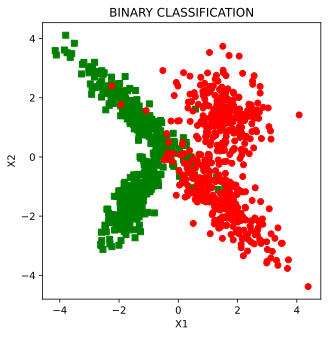

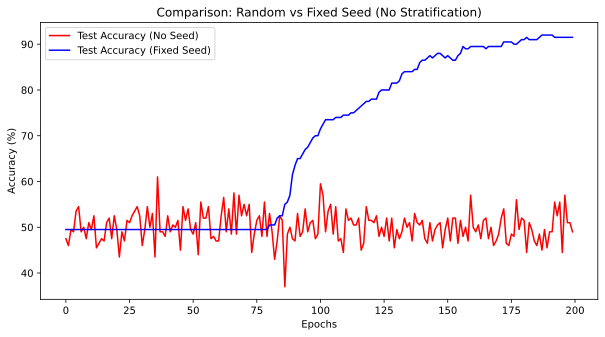

Average Test Accuracy (No Seed): 50.07%
Average Test Accuracy (Fixed Seed): 68.39%


In [43]:
# ---------------------------------------------------------
# Import libraries
# ---------------------------------------------------------
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ---------------------------------------------------------
# Create dataset
# ---------------------------------------------------------
X, y = make_classification(
    n_samples=1000, n_features=2,
    n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
    n_clusters_per_class=2, weights=None, flip_y=0.01,
    class_sep=1.5, hypercube=True, shift=0.0, scale=1.0,
    shuffle=True, random_state=69
)

# convert to torch tensors
data = torch.tensor(X).float()
labels = torch.tensor(y).float().view(-1, 1)

# visualize dataset
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'gs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ro')
plt.title('BINARY CLASSIFICATION')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# ---------------------------------------------------------
# Define model
# ---------------------------------------------------------
def model():
    ann = nn.Sequential(
        nn.Linear(2,1),   # input layer
        nn.ReLU(),        # activation unit
        nn.Linear(1,1)    # output layer
    )
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(ann.parameters(), lr=0.01)
    return ann, lossfunc, optim

# ---------------------------------------------------------
# Global parameters
# ---------------------------------------------------------
epochs = 200

# ---------------------------------------------------------
# Train function
# ---------------------------------------------------------
def train(trainProp, use_seed=False):
    ann, lossfunc, optim = model()
    train_accuracy = []
    test_accuracy  = []

    for i in range(epochs):
        # if seed is used, fix all randomness
        if use_seed:
            torch.manual_seed(21)
            np.random.seed(21)
            random_state = 21
        else:
            random_state = None

        # non-stratified split
        X_train, X_test, y_train, y_test = train_test_split(
            data, labels, train_size=trainProp, shuffle=True,
            stratify=None, random_state=random_state
        )

        # forward pass and loss
        pred_train = ann(X_train)
        loss = lossfunc(pred_train, y_train)

        # backpropagation
        optim.zero_grad()
        loss.backward()
        optim.step()

        # training accuracy
        pred_train_proba = torch.sigmoid(pred_train).detach()
        pred_train_labels = (pred_train_proba >= 0.5).float()
        acc_train = 100 * torch.mean((pred_train_labels == y_train).float()).item()
        train_accuracy.append(acc_train)

        # test accuracy
        pred_test_proba = torch.sigmoid(ann(X_test)).detach()
        pred_test_labels = (pred_test_proba >= 0.5).float()
        acc_test = 100 * torch.mean((pred_test_labels == y_test).float()).item()
        test_accuracy.append(acc_test)

    return train_accuracy, test_accuracy

# ---------------------------------------------------------
# Run experiments
# ---------------------------------------------------------
trainProp = 0.8

# Original: random (no seed, no stratification)
train_acc_orig, test_acc_orig = train(trainProp, use_seed=False)

# With seed: fixed split every epoch, still no stratification
train_acc_seeded, test_acc_seeded = train(trainProp, use_seed=True)

# ---------------------------------------------------------
# Plot comparison
# ---------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(test_acc_orig, 'r-', label='Test Accuracy (No Seed)')
plt.plot(test_acc_seeded, 'b-', label='Test Accuracy (Fixed Seed)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Comparison: Random vs Fixed Seed (No Stratification)')
plt.show()

# ---------------------------------------------------------
# Print summary statistics
# ---------------------------------------------------------
print(f"Average Test Accuracy (No Seed): {np.mean(test_acc_orig):.2f}%")
print(f"Average Test Accuracy (Fixed Seed): {np.mean(test_acc_seeded):.2f}%")


#Experiment 3

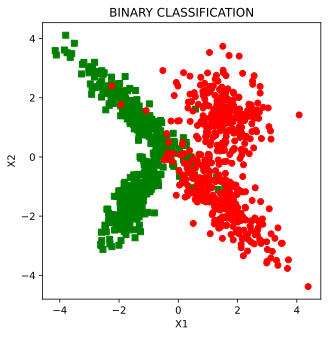

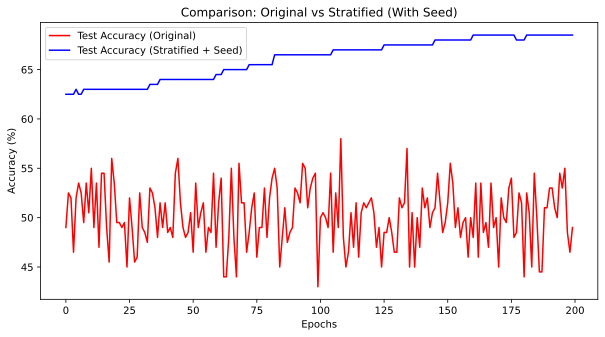

Average Test Accuracy (Original): 50.16%
Average Test Accuracy (Stratified + Seed): 66.07%


In [28]:
# ---------------------------------------------------------
# Import libraries
# ---------------------------------------------------------
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ---------------------------------------------------------
# Create dataset
# ---------------------------------------------------------
X, y = make_classification(
    n_samples=1000, n_features=2,
    n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
    n_clusters_per_class=2, weights=None, flip_y=0.01,
    class_sep=1.5, hypercube=True, shift=0.0, scale=1.0,
    shuffle=True, random_state=69
)

# convert to torch tensors
data = torch.tensor(X).float()
labels = torch.tensor(y).float().view(-1, 1)

# visualize dataset
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'gs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ro')
plt.title('BINARY CLASSIFICATION')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# ---------------------------------------------------------
# Define model
# ---------------------------------------------------------
def model():
    ann = nn.Sequential(
        nn.Linear(2,1),   # input layer
        nn.ReLU(),        # activation unit
        nn.Linear(1,1)    # output layer
    )
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(ann.parameters(), lr=0.01)
    return ann, lossfunc, optim

# ---------------------------------------------------------
# Global parameters
# ---------------------------------------------------------
epochs = 200

# ---------------------------------------------------------
# Train function
# ---------------------------------------------------------
def train(trainProp, use_seed=False, stratify=False):
    ann, lossfunc, optim = model()
    train_accuracy = []
    test_accuracy  = []

    for i in range(epochs):
        # if seed is used, fix the randomness
        if use_seed:
            torch.manual_seed(542)
            np.random.seed(542)
            random_state = 542
        else:
            random_state = None

        # apply stratification if required
        strat_labels = labels if stratify else None

        # split data
        X_train, X_test, y_train, y_test = train_test_split(
            data, labels, train_size=trainProp, shuffle=True,
            stratify=strat_labels, random_state=random_state
        )

        # forward pass and loss
        pred_train = ann(X_train)
        loss = lossfunc(pred_train, y_train)

        # backpropagation
        optim.zero_grad()
        loss.backward()
        optim.step()

        # training accuracy
        pred_train_proba = torch.sigmoid(pred_train).detach()
        pred_train_labels = (pred_train_proba >= 0.5).float()
        acc_train = 100 * torch.mean((pred_train_labels == y_train).float()).item()
        train_accuracy.append(acc_train)

        # test accuracy
        pred_test_proba = torch.sigmoid(ann(X_test)).detach()
        pred_test_labels = (pred_test_proba >= 0.5).float()
        acc_test = 100 * torch.mean((pred_test_labels == y_test).float()).item()
        test_accuracy.append(acc_test)

    return train_accuracy, test_accuracy

# ---------------------------------------------------------
# Run experiments
# ---------------------------------------------------------
trainProp = 0.8

# Original: random, non-stratified, non-seeded
train_acc_orig, test_acc_orig = train(trainProp, use_seed=False, stratify=False)

# With seed and stratification
train_acc_strat_seed, test_acc_strat_seed = train(trainProp, use_seed=True, stratify=True)

# ---------------------------------------------------------
# Plot comparison
# ---------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(test_acc_orig, 'r-', label='Test Accuracy (Original)')
plt.plot(test_acc_strat_seed, 'b-', label='Test Accuracy (Stratified + Seed)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Comparison: Original vs Stratified (With Seed)')
plt.show()

# ---------------------------------------------------------
# Print summary statistics
# ---------------------------------------------------------
print(f"Average Test Accuracy (Original): {np.mean(test_acc_orig):.2f}%")
print(f"Average Test Accuracy (Stratified + Seed): {np.mean(test_acc_strat_seed):.2f}%")


#Experiment 4

Epochs: 100, Layers: 1, Params: 33, LR: 0.0005, Accuracy: 29.00%
Epochs: 100, Layers: 5, Params: 321, LR: 0.0005, Accuracy: 50.00%
Epochs: 100, Layers: 10, Params: 681, LR: 0.0005, Accuracy: 50.00%
Epochs: 100, Layers: 1, Params: 33, LR: 0.005, Accuracy: 70.00%
Epochs: 100, Layers: 5, Params: 321, LR: 0.005, Accuracy: 50.00%
Epochs: 100, Layers: 10, Params: 681, LR: 0.005, Accuracy: 50.00%
Epochs: 100, Layers: 1, Params: 33, LR: 0.05, Accuracy: 93.00%
Epochs: 100, Layers: 5, Params: 321, LR: 0.05, Accuracy: 50.00%
Epochs: 100, Layers: 10, Params: 681, LR: 0.05, Accuracy: 50.00%
Epochs: 100, Layers: 1, Params: 33, LR: 0.1, Accuracy: 95.50%
Epochs: 100, Layers: 5, Params: 321, LR: 0.1, Accuracy: 70.00%
Epochs: 100, Layers: 10, Params: 681, LR: 0.1, Accuracy: 50.00%
Epochs: 100, Layers: 1, Params: 33, LR: 0.2, Accuracy: 95.00%
Epochs: 100, Layers: 5, Params: 321, LR: 0.2, Accuracy: 95.50%
Epochs: 100, Layers: 10, Params: 681, LR: 0.2, Accuracy: 50.00%
Epochs: 300, Layers: 1, Params: 33, L

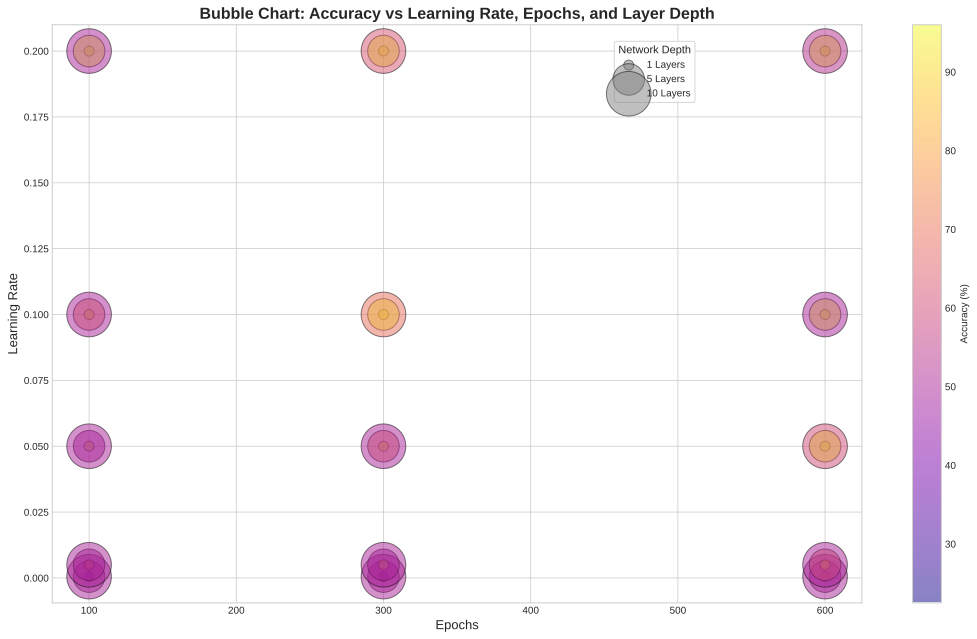

In [44]:
# ---------------------------------------------------------
# Improved Hyperparameter Experiment
# ---------------------------------------------------------
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# ---------------------------------------------------------
# Dataset
# ---------------------------------------------------------
X, y = make_classification(
    n_samples=1000, n_features=2,
    n_informative=2, n_redundant=0, n_classes=2,
    n_clusters_per_class=2, flip_y=0.01, class_sep=1.5, random_state=69
)
data = torch.tensor(X).float()
labels = torch.tensor(y).float().view(-1, 1)

# ---------------------------------------------------------
# Model creation
# ---------------------------------------------------------
def create_model(num_layers, hidden_dim=8):
    layers = []
    input_dim = 2
    for _ in range(num_layers):
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        input_dim = hidden_dim
    layers.append(nn.Linear(hidden_dim, 1))
    return nn.Sequential(*layers)

# ---------------------------------------------------------
# Count parameters
# ---------------------------------------------------------
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# ---------------------------------------------------------
# Training function
# ---------------------------------------------------------
def train_model(model, lr, epochs):
    lossfunc = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(model.parameters(), lr=lr)

    X_train, X_test, y_train, y_test = train_test_split(
        data, labels, train_size=0.8, stratify=labels, random_state=42
    )

    for _ in range(epochs):
        pred_train = model(X_train)
        loss = lossfunc(pred_train, y_train)
        optim.zero_grad()
        loss.backward()
        optim.step()

    with torch.no_grad():
        pred_test = torch.sigmoid(model(X_test))
        pred_test_labels = (pred_test >= 0.5).float()
        accuracy = 100 * torch.mean((pred_test_labels == y_test).float()).item()
    return accuracy

# ---------------------------------------------------------
# New experimental ranges
# ---------------------------------------------------------
learning_rates = [0.0005, 0.005, 0.05, 0.1, 0.2]
num_layers_list = [1, 5, 10]
epoch_list = [100, 300, 600]

results = []

# ---------------------------------------------------------
# Run experiments
# ---------------------------------------------------------
for epochs in epoch_list:
    for lr in learning_rates:
        for num_layers in num_layers_list:
            ann = create_model(num_layers)
            acc = train_model(ann, lr, epochs)
            params = count_parameters(ann)
            results.append((epochs, lr, num_layers, params, acc))
            print(f"Epochs: {epochs}, Layers: {num_layers}, Params: {params}, LR: {lr}, Accuracy: {acc:.2f}%")

results = np.array(results, dtype=object)

# ---------------------------------------------------------
# Bubble Chart
# ---------------------------------------------------------
plt.figure(figsize=(15,9))

# map bubble size to number of layers (clear visual difference)
size_map = {1: 100, 5: 1000, 10: 2000}
bubble_sizes = [size_map[int(l)] for l in results[:,2]]

scatter = plt.scatter(
    results[:,0].astype(float),        # x-axis (epochs)
    results[:,1].astype(float),        # y-axis (learning rate)
    s=bubble_sizes,                    # bubble size = layers
    c=results[:,4].astype(float),      # color = accuracy
    cmap='plasma', alpha=0.5, edgecolors='black'
)

plt.colorbar(scatter, label='Accuracy (%)')
plt.xlabel('Epochs', fontsize=13)
plt.ylabel('Learning Rate', fontsize=13)
plt.title('Bubble Chart: Accuracy vs Learning Rate, Epochs, and Layer Depth', fontsize=16, weight='bold')

# ---------------------------------------------------------
# Legend INSIDE vacant area (top right)
# ---------------------------------------------------------
handles = [plt.scatter([], [], s=size_map[l], color='gray', alpha=0.5, edgecolors='black', label=f'{l} Layers')
            for l in num_layers_list]

plt.legend(
    handles=handles,
    title='Network Depth',
    loc='upper right',
    bbox_to_anchor=(0.80, 0.98),
    frameon=True,
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()
plt.show()


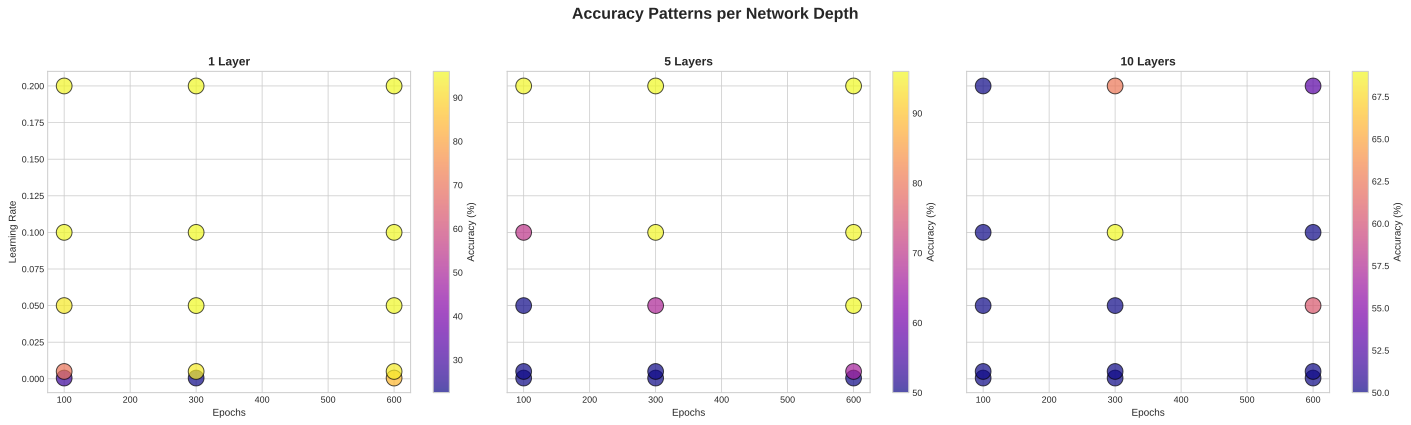

In [46]:
# ---------------------------------------------------------
# Individual Graphs for Each Layer Configuration (each with its own accuracy legend)
# ---------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')

unique_layers = sorted(list(set(results[:,2].astype(int))))
fig, axes = plt.subplots(1, len(unique_layers), figsize=(20, 6), sharey=True)

for i, layer in enumerate(unique_layers):
    layer_mask = results[:,2].astype(int) == layer
    subset = results[layer_mask]

    sc = axes[i].scatter(
        subset[:,0].astype(float),     # x-axis: epochs
        subset[:,1].astype(float),     # y-axis: learning rate
        s=250,                         # constant bubble size
        c=subset[:,4].astype(float),   # color = accuracy
        cmap='plasma', edgecolors='black', alpha=0.7
    )

    # add individual colorbar for each subplot
    cbar = fig.colorbar(sc, ax=axes[i])
    cbar.set_label('Accuracy (%)', fontsize=10)
    cbar.ax.tick_params(labelsize=9)

    axes[i].set_title(f'{layer} Layer{"s" if layer > 1 else ""}', fontsize=12, weight='bold')
    axes[i].set_xlabel('Epochs', fontsize=10)
    if i == 0:
        axes[i].set_ylabel('Learning Rate', fontsize=10)
    axes[i].tick_params(axis='both', labelsize=9)

plt.suptitle('Accuracy Patterns per Network Depth', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
